# IS362 FINAL PROJECT

### W. Edwards Deming said, “In God we trust, all others must bring data.” Please use data to determine whether Best Film Editing is the best predictor of Best Picture. Consider your work as an exploration; there is not necessarily a “right answer.”


### The data that you decide to collect should reside in a MySQL database, in a set of normalized tables. Below is the MySQL query run to create this database.

SET SQL_SAFE_UPDATES = 0;

DROP TABLE IF EXISTS data;
DROP TABLE IF EXISTS entity_Table;
DROP TABLE IF EXISTS category_Table;

CREATE TABLE data(
  year integer,
  category mediumtext,
  winner varchar(100),
  entity mediumtext
  );

LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/data/data_csv.csv' 
INTO TABLE data
FIELDS TERMINATED BY ',' 
ENCLOSED BY '"'
LINES TERMINATED BY '\n'
IGNORE 1 ROWS;

CREATE TABLE entity_Table(
  entityID integer,
  entityNAME mediumtext
  );

LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/data/entity_table.csv' 
INTO TABLE entity_Table
FIELDS TERMINATED BY ',' 
ENCLOSED BY '"'
LINES TERMINATED BY '\n'
IGNORE 1 ROWS;

CREATE TABLE category_Table(
  category integer,
  categoryNAME mediumtext
  );

LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/data/category_table.csv' 
INTO TABLE category_Table
FIELDS TERMINATED BY ',' 
ENCLOSED BY '"'
LINES TERMINATED BY '\n'
IGNORE 1 ROWS;

### Data import & dataframe creation

In [52]:
# Below I imported the necessary modules

import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from pandas import read_csv
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import requests

# Below I read the 3 tables, category_table and entity_Table as dictionaries so that I can use the map function to replace values.

category_table = pd.read_csv(r"C:\Users\thety\Google Drive\CUNY\IS362\\final project\category_Table.csv", header=None, index_col=0, squeeze=True).to_dict()
data = r"C:\Users\thety\Google Drive\CUNY\IS362\\final project\data_csv.csv" 
entity_Table = pd.read_csv(r"C:\Users\thety\Google Drive\CUNY\IS362\\final project\entity_Table.csv", header=None, index_col=0, squeeze=True).to_dict()

data_table = pd.read_csv(data)

print(data_table)

# Below I reverse the dictionaries, as my "key" was in the wrong column

reversed_entity_Table = {value : key for (key, value) in entity_Table.items()}
reversed_category_table = {value : key for (key, value) in category_table.items()}

       year                                           category  winner  \
0      1927                                              ACTOR   False   
1      1927                                              ACTOR    True   
2      1927                                            ACTRESS   False   
3      1927                                            ACTRESS    True   
4      1927                                            ACTRESS   False   
...     ...                                                ...     ...   
11053  2017  SCIENTIFIC AND TECHNICAL AWARD (Scientific and...    True   
11054  2017  SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...    True   
11055  2017  SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...    True   
11056  2017  SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...    True   
11057  2017  SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...    True   

                                                  entity  
0                                    Richard Barthel

### Data manipulation and shaping

In [53]:
# Below I use the map function to replace category and entity columns, to normalize the data

data_table['entity'] = data_table['entity'].map(reversed_entity_Table)
data_table['category'] = data_table['category'].map(reversed_category_table)

# Below I drop data from before the year 1940 and non-winners, since the categories I will compare were all introduced this year

data_table.drop(data_table[data_table['year'] < 1962].index, inplace = True)
data_table.drop(data_table[data_table['winner'] == False].index, inplace = True)

# Below i create dataframes that contain only winners for specific categories

data_table_best = data_table.drop(data_table[(data_table['category'] != '70')].index)
data_table_editing = data_table.drop(data_table[(data_table['category'] != '25')].index)
data_table_actor = data_table.drop(data_table[(data_table['category'] != '90')].index)
data_table_actress = data_table.drop(data_table[(data_table['category'] != '91')].index)
data_table_music = data_table.drop(data_table[(data_table['category'] != '36')].index)
data_table_screenplay = data_table.drop(data_table[(data_table['category'] != '42')].index)
data_table_cinematography = data_table.drop(data_table[(data_table['category'] != '4')].index)

# Below I join dataframes of specific categories on best picture winners

best_picture_editing = pd.merge(left=data_table_best, right=data_table_editing, how='left', left_on='entity', right_on='entity')
best_picture_editing.dropna(subset=['category_y'], inplace = True)

best_picture_actor = pd.merge(left=data_table_best, right=data_table_actor, how='left', left_on='entity', right_on='entity')
best_picture_actor.dropna(subset=['category_y'], inplace = True)

best_picture_actress = pd.merge(left=data_table_best, right=data_table_actress, how='left', left_on='entity', right_on='entity')
best_picture_actress.dropna(subset=['category_y'], inplace = True)

best_picture_music = pd.merge(left=data_table_best, right=data_table_music, how='left', left_on='entity', right_on='entity')
best_picture_music.dropna(subset=['category_y'], inplace = True)

best_picture_screenplay = pd.merge(left=data_table_best, right=data_table_screenplay, how='left', left_on='entity', right_on='entity')
best_picture_screenplay.dropna(subset=['category_y'], inplace = True)

best_picture_cinematography = pd.merge(left=data_table_best, right=data_table_cinematography, how='left', left_on='entity', right_on='entity')
best_picture_cinematography.dropna(subset=['category_y'], inplace = True)

# Below I check that my above code worked as intended

print(best_picture_editing)

    year_x category_x  winner_x entity  year_y category_y winner_y
0     1962         70      True   2443  1962.0         25     True
3     1965         70      True   2655  1965.0         25     True
5     1967         70      True   2797  1967.0         25     True
8     1970         70      True   2987  1970.0         25     True
9     1971         70      True   3054  1971.0         25     True
11    1973         70      True   3179  1973.0         25     True
14    1976         70      True   3389  1976.0         25     True
16    1978         70      True   3520  1978.0         25     True
20    1982         70      True   3797  1982.0         25     True
24    1986         70      True   4074  1986.0         25     True
25    1987         70      True   4149  1987.0         25     True
28    1990         70      True   4368  1990.0         25     True
30    1992         70      True   4516  1992.0         25     True
31    1993         70      True   4590  1993.0         25     

### Graphing my results

Text(0, 0.5, 'Wins incl. BP')

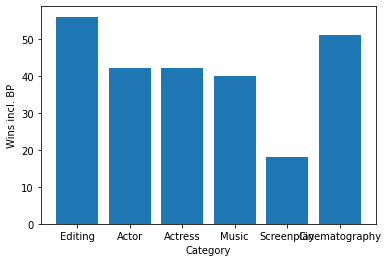

In [54]:
# I create a new dataframe that contains the number of wins which include a best picture win and which category that was

data = [['Editing', len(data_table_editing.index)], ['Actor', len(data_table_actor.index)], ['Actress', len(data_table_actress.index)], ['Music', len(data_table_music.index)], ['Screenplay', len(data_table_screenplay.index)], ['Cinematography', len(data_table_cinematography.index)]]

new_df = pd.DataFrame(data, columns = ['Category', 'Wins incl. BP'])

# Below I create a bar graph to show the results

c = new_df['Category']
d = new_df['Wins incl. BP']

plt.bar(c,d)

plt.xlabel("Category")
plt.ylabel("Wins incl. BP")

### As you can see above, from importing three different tables from an SQL database, we are able to manipulate the data as we need to create a chart which displays that 'Best Film Editing' is the best predictor of 'Best Picture'.